In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv('datasets/boston.csv')
print('Shape: {}'.format(boston.shape))
boston.head()

Shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Target variable:** MEDV

In [3]:
# Drop the target to make features arrays
X = boston.drop('MEDV', axis=1).values
# Create the target array
y = boston['MEDV'].values

## Predicting house value from a single feature

In [4]:
# Extract the Room feature
X_rooms = X[:,5]

# check the types
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
# check the shapes
X_rooms.shape, y.shape

((506,), (506,))

### Reshaping feature and target

In [6]:
# -1 means keeping the existing dimension (506,) -> (506, 1)
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)
X_rooms.shape, y.shape

((506, 1), (506, 1))

### Plotting house value vs. number of rooms

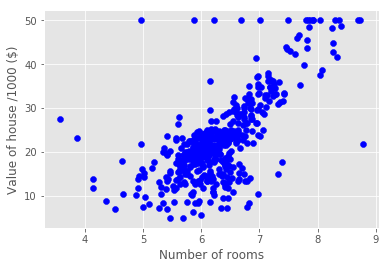

In [7]:
plt.style.use('ggplot')

plt.scatter(X_rooms, y, color='blue')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms');

Obviously, more rooms lead to higher prices

# Fitting a regression model

In [15]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Plotting the regression line

In [16]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
prediction_space.shape

(50, 1)

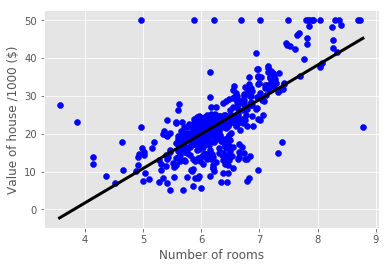

In [17]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3);
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000 ($)');

# Regression mechanics
- $y = ax + b$
 - y = target
 - x = single feature
 - a,b = parameters of model
To choose a and b is to define an error function for any given line
- Then choose the line that minimizes the error function

## The loss function
- Linear regression minimizes a loss function
- **Ordinary least squares (OLS)**: Minimize sum of squares of residuals
- fit() performs OLS under the hood

## Linear regression in higher dimensions
$y = a_1x_1 + a_2x_2 + a_3x_3 + a_nx_n + b$<br>
To fit a linear regression, specify *coefficient* for each feature ($a_1..a_n$) and *intercept* $b$

## Score
The default scoring method for linear regression in scikit-learn is $R^2$

# Fitting a regression model using all features
Note that generally **linear regression is never used out-of-the-box like this**. Most likely used with **regularization**.

In [26]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size = 0.3, random_state=42)

# fit
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)

# predict
y_pred = reg_all.predict(X_test)

# score
print('R-squared: {}'.format(reg_all.score(X_test, y_test)))

R-squared: 0.7112260057484935
